## importing libraries

In [6]:
import re
import pickle
import scipy.stats as stats
import pandas as pd
import numpy as np
from tqdm import tqdm
from getDialect import detectDialect
import matplotlib.pyplot as plt
from itertools import combinations
from qna_simulation import answer_extractor
from qna_simulation import run_simulation
from utils import extract_model_accuracy
from utils import build_politeness_classifier
from utils import predict_politeness
from utils import get_readability_score
from utils import categorize_score
from utils import calculate_entropy
from utils import create_readability_plot

## Q&A simulation (one question per subject from MMLU)
#### This might take 3-5 minutes

In [3]:
## loading dataset names from pickle file
dataset_name = "bigbench"

if dataset_name == 'bigbench':
    category_names = ['navigate', 'tracking_shuffled_objects_three_objects','temporal_sequences', 'date_understanding', 'penguins_in_a_table','causal_judgement']
else:
    with open("dataset_name.pkl", "rb") as f:
        category_names = pickle.load(f)



'''
important note:
parameter "aave" = True means you want to change the whole question prompt to AAVE 
However, the "aave_instruct" = True just means you only want to change the instruction part of the question prompt to AAVE, 
the acutal question remains SAE. "aave" and "aave_instruct" can not both be True.
'''

df_regular = run_simulation(dataset_name = dataset_name, category_names =category_names,   model_name = "gpt-3.5", aave= True, n_run = 1, aave_instruct = False, converter_type = "both")

df_regular

Loading phonate from configuration: default_config.json
Finished loading models and tokenizer


  0%|          | 0/6 [00:00<?, ?it/s]

                                              question answer   dataset_name  \
0    If you follow these instructions, do you retur...      B  BigBench_hard   
1    If you follow these instructions, do you retur...      B  BigBench_hard   
2    If you follow these instructions, do you retur...      B  BigBench_hard   
3    If you follow these instructions, do you retur...      A  BigBench_hard   
4    If you follow these instructions, do you retur...      B  BigBench_hard   
..                                                 ...    ...            ...   
245  If you follow these instructions, do you retur...      B  BigBench_hard   
246  If you follow these instructions, do you retur...      A  BigBench_hard   
247  If you follow these instructions, do you retur...      B  BigBench_hard   
248  If you follow these instructions, do you retur...      B  BigBench_hard   
249  If you follow these instructions, do you retur...      B  BigBench_hard   

     category  
0    navigate  
1    na

 17%|█▋        | 1/6 [00:21<01:47, 21.60s/it]

                                              question answer   dataset_name  \
0    Alice, Bob, and Claire are friends and avid re...      B  BigBench_hard   
1    Alice, Bob, and Claire are friends and avid re...      A  BigBench_hard   
2    Alice, Bob, and Claire are friends and avid re...      C  BigBench_hard   
3    Alice, Bob, and Claire are dancers at a square...      C  BigBench_hard   
4    Alice, Bob, and Claire are friends and avid re...      A  BigBench_hard   
..                                                 ...    ...            ...   
245  Alice, Bob, and Claire are holding a white ele...      C  BigBench_hard   
246  Alice, Bob, and Claire are friends and avid re...      A  BigBench_hard   
247  Alice, Bob, and Claire are dancers at a square...      B  BigBench_hard   
248  Alice, Bob, and Claire are on the same team in...      A  BigBench_hard   
249  Alice, Bob, and Claire are on the same team in...      B  BigBench_hard   

                                    cat

 33%|███▎      | 2/6 [00:31<00:59, 14.91s/it]

                                              question answer   dataset_name  \
0    Today, Susan went to the coffee shop. Between ...      A  BigBench_hard   
1    Today, Emily went to the soccer field. Between...      C  BigBench_hard   
2    Today, Susan went to the restaurant. Between w...      B  BigBench_hard   
3    Today, James went to the beach. Between what t...      D  BigBench_hard   
4    Today, Jason went to the movies. Between what ...      A  BigBench_hard   
..                                                 ...    ...            ...   
245  Today, Elizabeth went to the swimming pool. Be...      C  BigBench_hard   
246  Today, Lisa went to the art show. Between what...      C  BigBench_hard   
247  Today, Nancy went to the movies. Between what ...      A  BigBench_hard   
248  Today, John went to the clothing store. Betwee...      A  BigBench_hard   
249  Today, Kimberly went to the swimming pool. Bet...      D  BigBench_hard   

               category  
0    temporal

 50%|█████     | 3/6 [00:40<00:36, 12.28s/it]

                                              question answer   dataset_name  \
0    Today is Christmas Eve of 1937. What is the da...      B  BigBench_hard   
1    In the UK, people usually put the day before t...      A  BigBench_hard   
2    Jane and John married on Jan 2, 1958. It is th...      B  BigBench_hard   
3    Jane scheduled 3 apointments with 5 poeple for...      E  BigBench_hard   
4    Today's meeting is rescheduled to 11 am tomorr...      B  BigBench_hard   
..                                                 ...    ...            ...   
245  Today is the last day of the first quarter of ...      D  BigBench_hard   
246  Today, 8/3/1997, is a day that we will never f...      D  BigBench_hard   
247  Today is Christmas Eve of 1937. What is the da...      B  BigBench_hard   
248  Yesterday, Jan 21, 2011, Jane ate 2 pizzas and...      F  BigBench_hard   
249  Jane was born on the last day of Feburary in 2...      F  BigBench_hard   

               category  
0    date_und

 67%|██████▋   | 4/6 [00:49<00:21, 10.62s/it]

                                              question answer   dataset_name  \
0    Here is a table where the first line is a head...      E  BigBench_hard   
1    Here is a table where the first line is a head...      C  BigBench_hard   
2    Here is a table where the first line is a head...      C  BigBench_hard   
3    Here is a table where the first line is a head...      A  BigBench_hard   
4    Here is a table where the first line is a head...      C  BigBench_hard   
..                                                 ...    ...            ...   
141  Here is a table where the first line is a head...      E  BigBench_hard   
142  Here is a table where the first line is a head...      B  BigBench_hard   
143  Here is a table where the first line is a head...      D  BigBench_hard   
144  Here is a table where the first line is a head...      E  BigBench_hard   
145  Here is a table where the first line is a head...      C  BigBench_hard   

                category  
0    penguin

 83%|████████▎ | 5/6 [00:56<00:09,  9.32s/it]

                                              question answer   dataset_name  \
0    How would a typical person answer each of the ...      B  BigBench_hard   
1    How would a typical person answer each of the ...      B  BigBench_hard   
2    How would a typical person answer each of the ...      A  BigBench_hard   
3    How would a typical person answer each of the ...      B  BigBench_hard   
4    How would a typical person answer each of the ...      A  BigBench_hard   
..                                                 ...    ...            ...   
182  How would a typical person answer each of the ...      A  BigBench_hard   
183  How would a typical person answer each of the ...      A  BigBench_hard   
184  How would a typical person answer each of the ...      A  BigBench_hard   
185  How would a typical person answer each of the ...      A  BigBench_hard   
186  How would a typical person answer each of the ...      A  BigBench_hard   

             category  
0    causal_jud

100%|██████████| 6/6 [01:03<00:00, 10.53s/it]


,subject,question,answer,letter_answer,pure_question,correct_answer
0,navigate,Hey there! Can you give me a hand with this mu...,"Sure, I'd be happy to help you with this multi...",B,"If you follow these instructions, do you retur...",B
1,tracking_shuffled_objects_three_objects,Ha dair! Can yaw help me wiff one multiple cha...,"Sure, I can help you with that multiple choice...",C,"Alice, Bob, and Claire are friends and avid re...",B
2,temporal_sequences,Ha dair! I'm stuck wiff a multiple chaus quest...,"Based on the information provided, we know tha...",D,"Today, Susan went to the coffee shop. Between ...",A
3,date_understanding,"Excuse me, can you help me with a multiple cho...","Sure, I can help you with that! \n\nTo determi...",B,Today is Christmas Eve of 1937. What is the da...,B
4,penguins_in_a_table,"Ha, can yaw help me wiff a question? I hos a t...",Based on the given table with information abou...,F,Here is a table where the first line is a head...,E
5,causal_judgement,How would a typical person answer the followin...,"Well, if I were the typical person who has no ...",B,How would a typical person answer each of the ...,B


## loading the Q&A simulation dataset from 7 different models

In [2]:

gpt3_path = "mmlu_dataset/gpt3/"
gpt4_path = "mmlu_dataset/gpt4/"
llama31_path = "mmlu_dataset/llama3.1/"
qwen_path = "mmlu_dataset/qwen2.5/"
llama32_path = "mmlu_dataset/llama3.2/"
gemma_path = "mmlu_dataset/gemma2/"
mistral_path = "mmlu_dataset/mistral/"

df_regular_gpt3 = pd.read_csv(gpt3_path+'regular_mmlu_qna.csv')
df_phonate_gpt3 = pd.read_csv(gpt3_path+'aave_phonate_mmlu_qna.csv')
df_llm_gpt3 = pd.read_csv(gpt3_path+'aave_llm_mmlu_qna.csv')
df_multivalue_gpt3 =  pd.read_csv(gpt3_path+'aave_multi_value_mmlu_qna.csv')
df_multi_phonate_gpt3 = pd.read_csv(gpt3_path+'aave_multi_phonate_mmlu_qna.csv')

df_regular_gpt4 = pd.read_csv(gpt4_path+'regular_mmlu_qna.csv')
df_phonate_gpt4 = pd.read_csv(gpt4_path+'aave_phonate_mmlu_qna.csv')
df_multivalue_gpt4 = pd.read_csv(gpt4_path+'aave_multi_value_mmlu_qna.csv')
df_llm_gpt4 = pd.read_csv(gpt4_path+'aave_llm_mmlu_qna.csv')
df_multi_phonate_gpt4 = pd.read_csv(gpt4_path+'aave_multi_phonate_mmlu_qna.csv')

df_regular_llama31 = pd.read_csv(llama31_path + "regular_mmlu_qna.csv")
df_phonate_llama31 = pd.read_csv(llama31_path + "aave_phonate_mmlu_qna.csv")
df_llm_llama31 = pd.read_csv(llama31_path + "aave_llm_mmlu_qna.csv")
df_multi_phonate_llama31 = pd.read_csv(llama31_path + "aave_multi_phonate_mmlu_qna.csv")
df_multivalue_llama31 = pd.read_csv(llama31_path + "aave_multi_value_mmlu_qna.csv")

df_regular_llama32 = pd.read_csv(llama32_path + "regular_mmlu_qna.csv")
df_phonate_llama32 = pd.read_csv(llama32_path + "aave_phonate_mmlu_qna.csv")
df_llm_llama32 = pd.read_csv(llama32_path + "aave_llm_mmlu_qna.csv")
df_multi_phonate_llama32 = pd.read_csv(llama32_path + "aave_multi_phonate_mmlu_qna.csv")
df_multivalue_llama32 = pd.read_csv(llama32_path + "aave_multi_value_mmlu_qna.csv")

df_regular_qwen = pd.read_csv(qwen_path + "regular_mmlu_qna.csv")
df_phonate_qwen = pd.read_csv(qwen_path + "aave_phonate_mmlu_qna.csv")
df_llm_qwen = pd.read_csv(qwen_path + "aave_llm_mmlu_qna.csv")
df_multi_phonate_qwen = pd.read_csv(qwen_path + "aave_multi_phonate_mmlu_qna.csv")
df_multivalue_qwen = pd.read_csv(qwen_path + "aave_multi_value_mmlu_qna.csv")

df_regular_gemma2 = pd.read_csv(gemma_path + "regular_mmlu_qna.csv")
df_phonate_gemma2 = pd.read_csv(gemma_path + "aave_phonate_mmlu_qna.csv")
df_llm_gemma2 = pd.read_csv(gemma_path + "aave_llm_mmlu_qna.csv")
df_multi_phonate_gemma2 = pd.read_csv(gemma_path + "aave_multi_phonate_mmlu_qna.csv")
df_multivalue_gemma2 = pd.read_csv(gemma_path + "aave_multi_value_mmlu_qna.csv")

df_regular_mistral = pd.read_csv(mistral_path + "regular_mmlu_qna.csv")
df_phonate_mistral = pd.read_csv(mistral_path + "aave_phonate_mmlu_qna.csv")
df_llm_mistral = pd.read_csv(mistral_path + "aave_llm_mmlu_qna.csv")
df_multi_phonate_mistral = pd.read_csv(mistral_path + "aave_multi_phonate_mmlu_qna.csv")
df_multivalue_mistral = pd.read_csv(mistral_path + "aave_multi_value_mmlu_qna.csv")

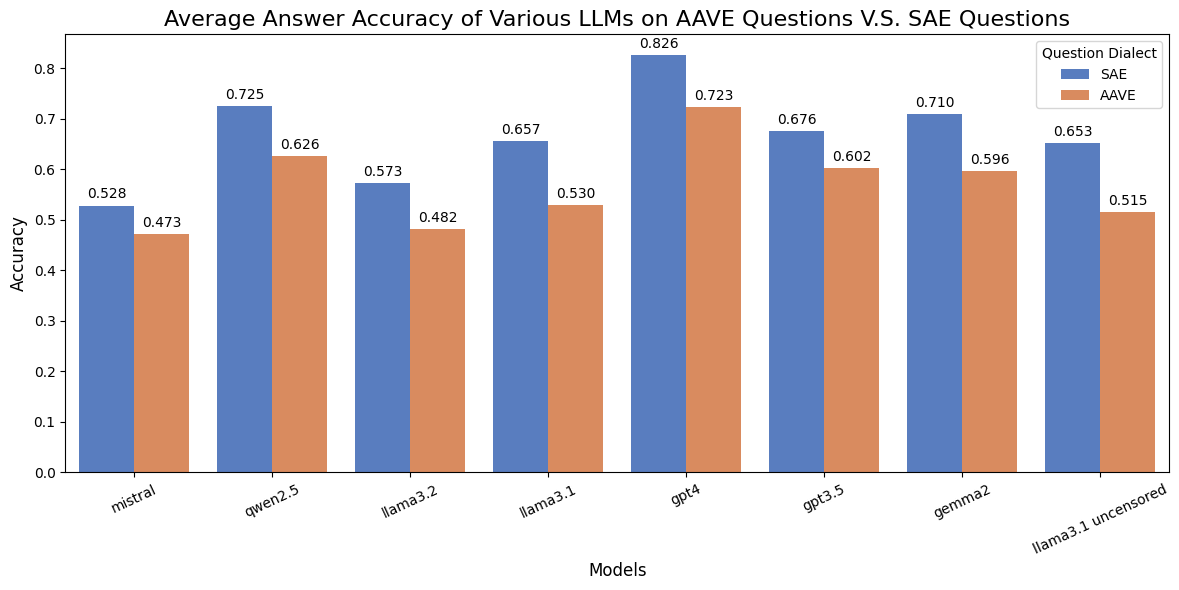

In [51]:
import seaborn as sns
df_accuracy = pd.read_csv('model_accuracy.csv')
df_llm_only = df_accuracy[(df_accuracy['converter'] == "none") | (df_accuracy['converter'] == "llm")]

data = {
        "Models": list(df_llm_only['model']),
        "Question Dialect": list(df_llm_only['converter']),
        "Accuracy": list(df_llm_only['accuracy']) # Notice one value is 0
    }
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df,
    x="Models",
    y="Accuracy",
    hue="Question Dialect",
    palette="muted"
)

# Adding values on top of the bars
for p in ax.patches:
    if p.get_height() > 0:  # Only add text for bars with height > 0
        ax.annotate(
            f'{p.get_height():.3f}',  # Format the value as an integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at bar center
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            xytext=(0, 8),  # Offset text position by 8 points
            textcoords='offset points'
        )

# Adding labels
plt.title("Average Answer Accuracy of Various LLMs on AAVE Questions V.S. SAE Questions", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation = 25)
# Change legend text
# Show the plot
handles, labels = ax.get_legend_handles_labels()  # Get current handles and labels
new_labels = ['SAE', 'AAVE']  # Define the new labels
ax.legend(handles, new_labels, title='Question Dialect')
plt.tight_layout()
plt.savefig("model_accuracy.png", dpi=300, format='png', bbox_inches='tight')
plt.show()

In [3]:

matches_regular_gpt4 = extract_model_accuracy(df_regular_gpt4)
matches_phonate_gpt4 = extract_model_accuracy(df_phonate_gpt4)
matches_llm_gpt4 =  extract_model_accuracy(df_llm_gpt4)
matches_multi_value_gpt4 =  extract_model_accuracy(df_multi_phonate_gpt4)
matches_multi_phonate_gpt4 =  extract_model_accuracy(df_multivalue_gpt4)

print(f"the accuracy of sae question from gpt4 is: {matches_regular_gpt4}")
print(f"the accuracy of aave phonate question from gpt4 is: {matches_phonate_gpt4}")
print(f"the accuracy of aave llm question from gpt4 is: {matches_llm_gpt4}")
print(f"the accuracy of aave multivalue question from gpt4 is: {matches_multi_value_gpt4}")
print(f"the accuracy of aave multivalue + phonate question from gpt4 is: {matches_multi_phonate_gpt4}")

the accuracy of sae question from gpt4 is: 0.8259649122807018
the accuracy of aave phonate question from gpt4 is: 0.7785964912280702
the accuracy of aave llm question from gpt4 is: 0.7228070175438597
the accuracy of aave multivalue question from gpt4 is: 0.8031578947368421
the accuracy of aave multivalue + phonate question from gpt4 is: 0.8270175438596491


## Experiment 1: Politeness Classification for LLM Answers
#### This process might take more than 5 mins 

In [ ]:
clf_polite = build_politeness_classifier()
politeness_classification_gpt4= predict_politeness(clf_polite, df_regular_gpt4)
print(f"polite answer for gpt4: {politeness_classification_gpt4[0]}")
print(f"neutral answer for gpt4: {politeness_classification_gpt4[1]}")

#### To same your time, this is the complete politeness score for all models and dialects converters. 

In [ ]:
df_politeness_score = pd.read_csv('politeness_score.csv')
df_politeness_score

## Experiment 2: Readability for LLM Answers

In [ ]:
reg_flesh_score_gpt4 = get_readability_score(df_regular_gpt4)
aave_flesh_score_gpt4 = get_readability_score(df_llm_gpt4)

#### After we get the flesch kincaid score, we want to classify each score into the corresponding grade level

In [ ]:
grade_level_regular = np.array([categorize_score(score) for score in reg_flesh_score_gpt4])
print("sae answer grade level")
print(np.unique(grade_level_regular, return_counts=True))
grade_level_aave = np.array([categorize_score(score) for score in aave_flesh_score_gpt4])
print("aave answer grade level")
print(np.unique(grade_level_aave, return_counts=True))

#### Again to same your time, I have run all the readability process and here is the result for gpt4 specifically. 

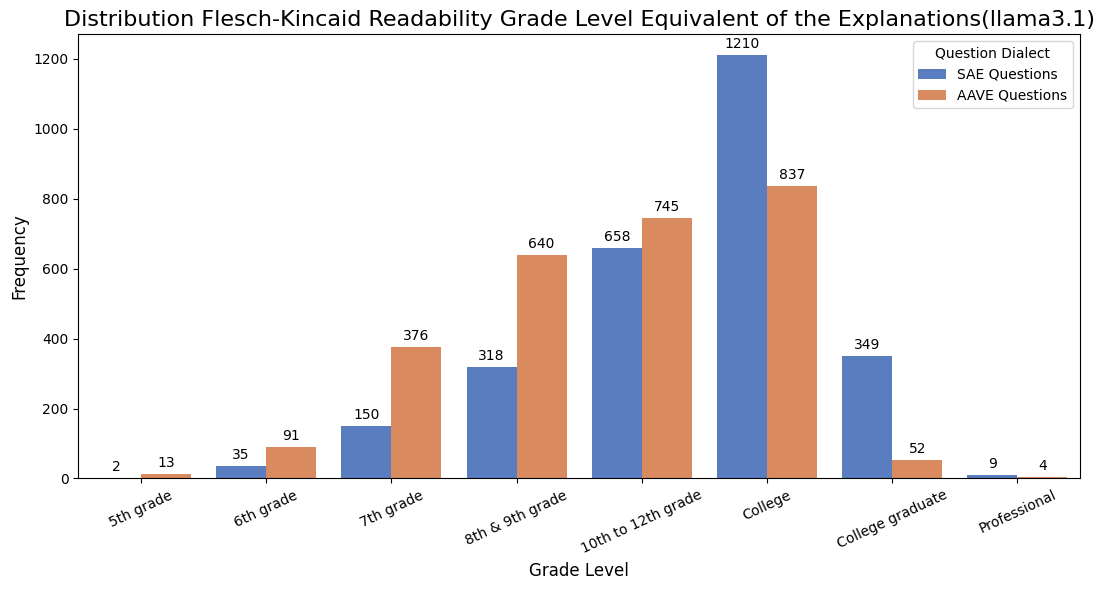

In [55]:
df_readability = pd.read_csv('readability_v1.csv')

create_readability_plot(df_readability, 'llama3.1')

## Experiment 3: Linguistic Marker Analysis 

In [ ]:
import re
from collections import Counter

def tokenize(text):
    # you may want to use a smarter tokenizer
    for match in re.finditer(r'\w+', text, re.UNICODE):
        yield match.group(0)

import liwc
parse, category_names = liwc.load_token_parser('LIWC2007_English100131.dic')

In [ ]:

def create_ling_marker_df (df, model, dialect):
    merged_counter_sae = Counter()
    token_num_sae = 0
    for i in range(len(df)):
        answer  = df.loc[i]['answer']
        count_tokens = tokenize(answer)
        for tok in count_tokens:
            token_num_sae+=1
        answer_tokens = tokenize(answer)
    
        # now flatmap over all the categories in all of the tokens using a generator:
        answer_counts = Counter(category for token in answer_tokens for category in parse(token))
        # and print the results:
        merged_counter_sae +=answer_counts
    normalized_counter_sae = Counter({word: (count / token_num_sae)*1000 for word, count in merged_counter_sae.items()})
    ling_count = [model, dialect]
    columns = ['ppron','i','you','we','they','social','posemo','negemo','tentat','certain','percept']
    for i in columns:
        ling_count.append(normalized_counter_sae[i])
    return ling_count



In [2]:
df_ling = pd.read_csv('linguistic_marker.csv')

In [11]:
lst = [
 'ppron',
 'i',
 'you',
 'we',
 'they',
 'social',
 'posemo',
 'negemo',
 'tentat',
 'certain',
 'percept']
for i in lst:
    sae_df = df_ling[df_ling['dialect']=='sae'][i]
    aave_df = df_ling[df_ling['dialect']=='aave'][i]
    print(i)
    t_statistic, p_value = stats.ttest_ind(aave_df, sae_df, equal_var= False)
    print(p_value)


ppron
0.027429534340205387
i
0.24823872889652515
you
0.00965744219130584
we
0.3989592261665108
they
0.028640834535546673
social
0.010551408317849717
posemo
0.34630572966180695
negemo
0.7503433235444048
tentat
0.11324880931707171
certain
0.3459995374459096
percept
0.1145350855033157


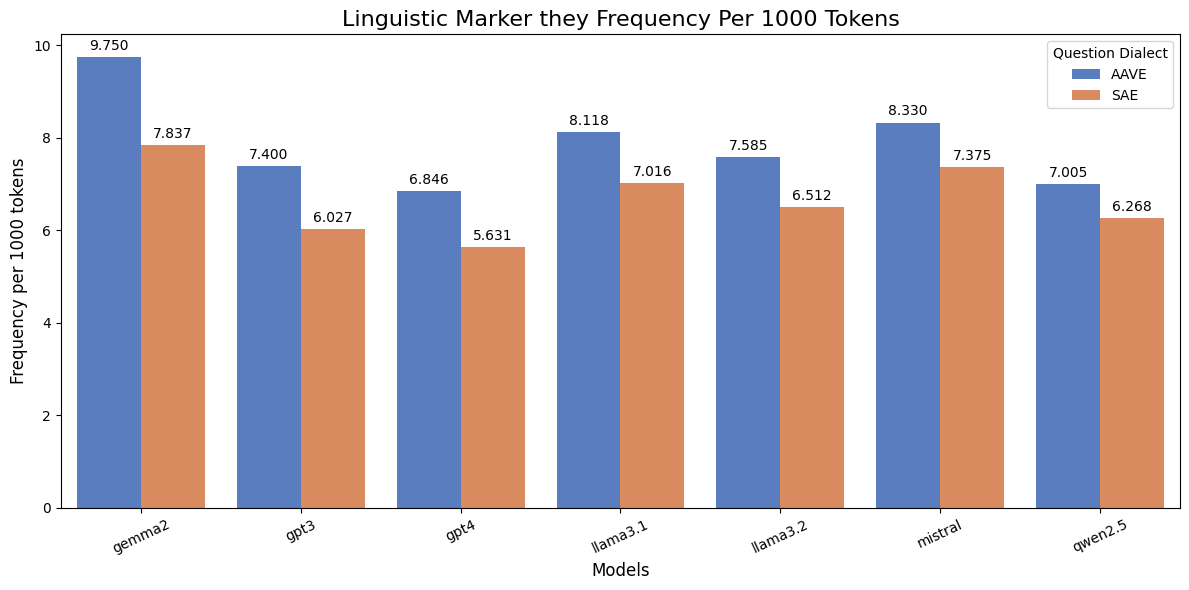

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#'you'
# "i"
# 'ppron'
#'social'
#'posemo'
#'tentat'
#'percept'
#'negemo'
# Group by 'model' and 'dialect' and extract a specific column, e.g., 'ppron'
marker = 'they'
plot_data = df_ling.pivot(index='model', columns='dialect', values=marker)

# Melt the pivoted DataFrame to long format for seaborn
df_long = plot_data.reset_index().melt(id_vars='model', var_name='Question Dialect', value_name='Frequency')

# Plot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_long,
    x="model",
    y="Frequency",
    hue="Question Dialect",
    palette="muted"
)

# Adding values on top of the bars
for p in ax.patches:
    if p.get_height() > 0:  # Only add text for bars with height > 0
        ax.annotate(
            f'{p.get_height():.3f}',  # Format the value as an integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at bar center
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            xytext=(0, 8),  # Offset text position by 8 points
            textcoords='offset points'
        )

# Adding labels
plt.title(f'Linguistic Marker {marker} Frequency Per 1000 Tokens', fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Frequency per 1000 tokens", fontsize=12)
plt.xticks(rotation=25)

# # Change legend text
# plt.legend(title="Question Dialect")
handles, labels = ax.get_legend_handles_labels()  # Get current handles and labels
new_labels = ['AAVE', 'SAE']  # Define the new labels
ax.legend(handles, new_labels, title='Question Dialect')

# Tight layout to avoid overlap
plt.tight_layout()
plt.savefig(f"liwc_{marker}.png", dpi=300, format='png', bbox_inches='tight')

# Show the plot
plt.show()


## Experiment 4: Uncertainty in the Answer Produced by LLMs.

with open("dataset_name.pkl", "rb") as f:
    dataset_names = pickle.load(f)
    
for i in range(10):
    df_regular = run_simulation(dataset_names = dataset_names, model_name = "gpt-3.5", aave= False, n_run = 1, aave_instruct = False, converter_type = "both")
    df_regular.to_csv(f'uncertainty_exp/sae_uncertainty_{i}.csv', header = True, index = False)

In [8]:
llm_model = "gpt-3.5"
df = pd.read_csv(f'uncertainty_exp/{llm_model}/aave_uncertainty_0.csv')
columns = df.columns
sae_uncertainty_df = pd.DataFrame(columns = columns)
aave_uncertainty_df = pd.DataFrame(columns = columns)

with open("dataset_name.pkl", "rb") as f:
    dataset_names = pickle.load(f)

for i in range(10):
    temp_df_sae = pd.read_csv(f'uncertainty_exp/{llm_model}/sae_uncertainty_{i}.csv')
    temp_df_aave = pd.read_csv(f'uncertainty_exp/{llm_model}/aave_uncertainty_{i}.csv')
    sae_uncertainty_df = pd.concat([sae_uncertainty_df, temp_df_sae], ignore_index=True)
    aave_uncertainty_df = pd.concat([aave_uncertainty_df, temp_df_aave], ignore_index=True)

sae_uncertainty_df['letter_answer'] = sae_uncertainty_df['letter_answer'].str.replace(r'[()]', '', regex=True)
aave_uncertainty_df['letter_answer'] = aave_uncertainty_df['letter_answer'].str.replace(r'[()]', '', regex=True)
# acc_sae = extract_model_accuracy(sae_uncertainty_df)
# acc_aave  = extract_model_accuracy(aave_uncertainty_df)
entropy_lst_sae = []
entropy_lst_aave = []
for name in dataset_names:
    name = name.split('-')[1]
    try:
        subject_df_sae = sae_uncertainty_df[sae_uncertainty_df['subject']==name]
        entropy_sae = calculate_entropy(subject_df_sae['letter_answer'])
        entropy_lst_sae.append(entropy_sae)
        subject_df_aave = aave_uncertainty_df[aave_uncertainty_df['subject']==name]
        entropy_aave = calculate_entropy(subject_df_aave['letter_answer'])
        entropy_lst_aave.append(entropy_aave)
    except:
        continue
print(sum(entropy_lst_sae)/len(entropy_lst_sae))
print(sum(entropy_lst_aave)/len(entropy_lst_aave))

0.6126960604186913
0.9091018898850336


In [6]:
from itertools import combinations
with open("dataset_name.pkl", "rb") as f:
    dataset_names = pickle.load(f)


from evaluate import load
bertscore = load("bertscore")
bertscore_lst_f1 = []
bertscore_lst_precision = []
bertscore_lst_recall = []
for name in dataset_names:
    name = name.split('-')[1]
    try:
        subject_df = aave_uncertainty_df[aave_uncertainty_df['subject']==name]
        unique_pairs = list(combinations(subject_df.index, 2))
        references = [subject_df.loc[i[0]]['answer'] for i in unique_pairs]
        predictions = [subject_df.loc[i[1]]['answer'] for i in unique_pairs]
        results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")
        bertscore_lst_f1.append(sum(results['f1'])/len(results['f1']))
        bertscore_lst_precision.append(sum(results['precision'])/len(results['precision']))
        bertscore_lst_recall.append(sum(results['recall'])/len(results['recall']))
    except:
        continue
print(f"the final score f1 is: {sum(bertscore_lst_f1)/len(bertscore_lst_f1)}")
print(f"the final score precision is: {sum(bertscore_lst_precision)/len(bertscore_lst_precision)}")
print(f"the final score recall is: {sum(bertscore_lst_recall)/len(bertscore_lst_recall)}")

the final score f1 is: 0.812460827732843
the final score precision is: 0.8119253202799769
the final score recall is: 0.8144499924684327


In [7]:
with open("dataset_name.pkl", "rb") as f:
    dataset_names = pickle.load(f)

from evaluate import load
bertscore = load("bertscore")
bertscore_lst_f1 = []
bertscore_lst_precision = []
bertscore_lst_recall = []
for name in dataset_names:
    name = name.split('-')[1]
    try:
        subject_df = sae_uncertainty_df[sae_uncertainty_df['subject']==name]
        unique_pairs = list(combinations(subject_df.index, 2))
        references = [subject_df.loc[i[0]]['answer'] for i in unique_pairs]
        predictions = [subject_df.loc[i[1]]['answer'] for i in unique_pairs]
        results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")
        bertscore_lst_f1.append(sum(results['f1'])/len(results['f1']))
        bertscore_lst_precision.append(sum(results['precision'])/len(results['precision']))
        bertscore_lst_recall.append(sum(results['recall'])/len(results['recall']))
    except:
        continue
print(f"the final score f1 is: {sum(bertscore_lst_f1)/len(bertscore_lst_f1)}")
print(f"the final score precision is: {sum(bertscore_lst_precision)/len(bertscore_lst_precision)}")
print(f"the final score recall is: {sum(bertscore_lst_recall)/len(bertscore_lst_recall)}")

the final score f1 is: 0.8482919288533075
the final score precision is: 0.8486514486963789
the final score recall is: 0.8481275712686872


## Extra Experiment: Using Uncensored LLAMA3.1 8B 

In [ ]:
df_regular_llama31

In [ ]:
import pandas as pd
from tqdm import tqdm
from transformers import pipeline

# llama3.1 8b path
llama31_path = "mmlu_dataset/llama3.1/"

df_llm_llama31 = pd.read_csv(llama31_path + "aave_llm_mmlu_qna.csv")

pipe = pipeline("text-generation", model="mlabonne/Meta-Llama-3.1-8B-Instruct-abliterated", device=0)

from qna_simulation import answer_extractor
answer_lst = []
question_lst = []
subject_lst = []
pure_question_lst =[]
correct_answer_lst = []
for i in tqdm(range(2)):
    print(i)
    question = df_llm_llama31.loc[i]['question']
    question_lst.append(df_llm_llama31.loc[i]['question'])
    subject_lst.append(df_llm_llama31.loc[i]['subject'])
    pure_question_lst.append( df_llm_llama31.loc[i]['pure_question'])
    correct_answer_lst.append( df_llm_llama31.loc[i]['correct_answer'])
    messages = [
        {"role": "user", "content": f"Someone asked you a multiple choice question: {question}, Please first provide an detailed explaination then your final answer. You need to make your explaination sounds as natural and realistic as possible At the end, you should state the letter option (A, B, C, or D) you choose. You answer should strictly be less than 400 words."},
    ]
    try:    
        answer = pipe(messages)[0]['generated_text'][1]['content']
        answer_lst.append(answer)
    except:
        answer_lst.append("Answer is C")
letter_lst = answer_extractor(answer_lst).generate()

return_df = pd.DataFrame(data = {"subject":subject_lst, "question":question_lst, "answer":answer_lst, 
                                "letter_answer": letter_lst, "pure_question":pure_question_lst, "correct_answer":correct_answer_lst})

return_df.to_csv("uncensored_llama31_aave.csv", header = True, index = False)
print('job finished')

In [7]:
from qna_simulation import answer_extractor
df_aave_uncensored = pd.read_csv('uncensored_llama31_aave.csv')

matches_aave_gpt4 = extract_model_accuracy(df_aave_uncensored)


print(matches_aave_gpt4)

0.515438596491228


In [17]:
model_accuracy_df.to_csv('model_accuracy.csv', header = True, index= False)


In [19]:
aave_flesh_score_gpt4 = get_readability_score(df_aave_uncensored)
grade_level_regular = np.array([categorize_score(score) for score in aave_flesh_score_gpt4])
print("sae answer grade level")
print(np.unique(grade_level_regular, return_counts=True))

100%|██████████| 2850/2850 [00:29<00:00, 97.51it/s] 

sae answer grade level
(array(['10th to 12th grade', '5th grade', '6th grade', '7th grade',
       '8th & 9th grade', 'College', 'College graduate', 'Invalid Score'],
      dtype='<U18'), array([735,  37, 168, 532, 753, 574,  37,   3]))


In [ ]:
import seaborn as sns
df = pd.read_csv('readability_v1.csv')
data = {
        "Grade Level": ['5th grade','5th grade','5th grade','6th grade','6th grade','6th grade','7th grade','7th grade','7th grade','8th & 9th grade','8th & 9th grade','8th & 9th grade','10th to 12th grade','10th to 12th grade','10th to 12th grade','College','College','College','College Graduate','College Graduate','College Graduate','Professional','Professional','Professional'],
        "Question Dialect": ['SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",'SAE',"AAVE","AAVE_RAW",],
        "Frequency": [2,13,37,35,91,168,150,376,562,318,640,753,658,745,735,1210,837,574,349,52,37,9,4,3] # Notice one value is 0
    }
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(11, 6))
ax = sns.barplot(
    data=df,
    x="Grade Level",
    y="Frequency",
    hue="Question Dialect",
    palette="muted"
)

# Adding values on top of the bars
for p in ax.patches:
    if p.get_height() > 0:  # Only add text for bars with height > 0
        ax.annotate(
            f'{p.get_height():.0f}',  # Format the value as an integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at bar center
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            xytext=(0, 8),  # Offset text position by 8 points
            textcoords='offset points'
        )

# Adding labels
plt.title(f"Distribution Flesch-Kincaid Readability Grade Level Equivalent of the Explanations({'llama3.1'})", fontsize=16)
plt.xlabel("Grade Level", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation = 25)
handles, labels = ax.get_legend_handles_labels()  # Get current handles and labels
new_labels = ['llama3.1/SAE', 'llama3.1/AAVE', 'llama3.1-uncensored/AAVE']  # Define the new labels
ax.legend(handles, new_labels, title='Answer Model/ Question Dialect')
# Show the plot
plt.savefig("flesch_kincaid_readability_grade_llama3.1_raw.png", dpi=300, format='png', bbox_inches='tight')
plt.tight_layout()
plt.show()

## Extra Data: Integrating Big Bench 

In [3]:
df_big_bench = pd.read_csv('bigbench_hard.csv')
df_big_bench.head()

,question,answer,dataset_name,category
0,"If you follow these instructions, do you retur...",B,BigBench_hard,navigate
1,"If you follow these instructions, do you retur...",B,BigBench_hard,navigate
2,"If you follow these instructions, do you retur...",B,BigBench_hard,navigate
3,"If you follow these instructions, do you retur...",A,BigBench_hard,navigate
4,"If you follow these instructions, do you retur...",B,BigBench_hard,navigate


In [4]:
df_big_bench['category'].unique()

array(['navigate', 'tracking_shuffled_objects_three_objects',
       'temporal_sequences', 'date_understanding', 'penguins_in_a_table',
       'causal_judgement'], dtype=object)